In [396]:
import pandas as pd
import numpy as np
import math
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import to_categorical
from keras.optimizers import Adam
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

### PENGAMBILAN DATA

In [397]:
# import data biji gandum (wheat seed)
raw_data = pd.read_csv("wheat-seed.csv", delimiter=";")
raw_data

Area  Perimeter  Compactness  LengthOfKernel  WidthOfKernel  \
0    15.26      14.84       0.8710           5.763          3.312   
1    14.88      14.57       0.8811           5.554          3.333   
2    14.29      14.09       0.9050           5.291          3.337   
3    13.84      13.94       0.8955           5.324          3.379   
4    16.14      14.99       0.9034           5.658          3.562   
..     ...        ...          ...             ...            ...   
205  12.19      13.20       0.8783           5.137          2.981   
206  11.23      12.88       0.8511           5.140          2.795   
207  13.20      13.66       0.8883           5.236          3.232   
208  11.84      13.21       0.8521           5.175          2.836   
209  12.30      13.34       0.8684           5.243          2.974   

     AsymmetryCoefficient  LengthOfKernelGroove  Class  
0                   2.221                 5.220      0  
1                   1.018                 4.956      0  
2                   2.699                 4.825      0  
3                   2.259                 4.805      0  
4                   1.355                 5.175      0  
..                    ...                   ...    ...  
205                 3.631                 4.870      2  
206                 4.325                 5.003      2  
207                 8.315                 5.056      2  
208                 3.598                 5.044      2  
209                 5.637                 5.063      2  

[210 rows x 8 columns]

In [398]:
# randomisasi data
rand_data = raw_data.sample(frac=1)
rand_data

Area  Perimeter  Compactness  LengthOfKernel  WidthOfKernel  \
58   15.38      14.77       0.8857           5.662          3.419   
162  12.05      13.41       0.8416           5.267          2.847   
196  12.79      13.53       0.8786           5.224          3.054   
155  11.19      13.05       0.8253           5.250          2.675   
126  18.65      16.41       0.8698           6.285          3.594   
..     ...        ...          ...             ...            ...   
108  19.94      16.92       0.8752           6.675          3.763   
34   15.05      14.68       0.8779           5.712          3.328   
26   13.02      13.76       0.8641           5.395          3.026   
18   14.70      14.21       0.9153           5.205          3.466   
72   17.26      15.73       0.8763           5.978          3.594   

     AsymmetryCoefficient  LengthOfKernelGroove  Class  
58                  1.999                 5.222      0  
162                 4.988                 5.046      2  
196                 5.483                 4.958      2  
155                 5.813                 5.219      2  
126                 4.391                 6.102      1  
..                    ...                   ...    ...  
108                 3.252                 6.550      1  
34                  2.129                 5.360      0  
26                  3.373                 4.825      0  
18                  1.767                 4.649      0  
72                  4.539                 5.791      1  

[210 rows x 8 columns]

### PERSIAPAN DATA

In [399]:
final_data = rand_data
# menentukan rasio data pelatihan
ratio = 0.7

# menentukan titik pembagian data
split_point = math.floor(len(final_data)*ratio)

# membagi data menjadi data pelatihan dan data validasi berdasarkan split point
train, val = final_data[:split_point], final_data[split_point:]
train.shape, val.shape

((147, 8), (63, 8))

In [400]:
# membagi data pelatihan dan validasi ke data input dan label
X_train, Y_train = train.drop(['Class'], axis=1), train.filter(['Class']).values
X_val, Y_val = val.drop(['Class'], axis=1), val.filter(['Class']).values

# mengubah data label (pelatihan dan validasi) menjadi label yang berkategori
Y_train = to_categorical(Y_train)
Y_val = to_categorical(Y_val)
X_train.shape, Y_train.shape

((147, 7), (147, 3))

In [401]:
# membangun model (menggunakan jaringan backpropagation), terdapat 5 hidden_layer, 1 output layer dengan 3 unit (3 Class) dengan fungsi aktivasi softmax
model = Sequential()
model.add(Dense(50))
model.add(Dense(100, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(3, activation="softmax"))

# meng-build model
model.build(input_shape=(None, X_train.shape[1]))

# mekompilasi model dengan menggunakan adam optimizer
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_186 (Dense)           (None, 50)                400       
                                                                 
 dense_187 (Dense)           (None, 100)               5100      
                                                                 
 dense_188 (Dense)           (None, 100)               10100     
                                                                 
 dense_189 (Dense)           (None, 100)               10100     
                                                                 
 dense_190 (Dense)           (None, 10)                1010      
                                                                 
 dense_191 (Dense)           (None, 3)                 33        
                                                                 
Total params: 26,743
Trainable params: 26,743
Non-tra

In [402]:
# menentukan nilai minimal akurasi 
ACCURACY_THRESHOLD = 0.95

# membuat fungsi callbak untuk mengecek akurasi
class CustomCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if(logs.get('val_accuracy') >= ACCURACY_THRESHOLD):
            self.model.stop_training = True

# proses training model
history = model.fit(X_train, Y_train, epochs=500, validation_data=(X_val, Y_val), callbacks=[CustomCallback()])

Epoch 1/500


5/5 [==============================] - 1s 40ms/step - loss: 1.2920 - accuracy: 0.3537 - val_loss: 1.0989 - val_accuracy: 0.2857
Epoch 2/500
5/5 [==============================] - 0s 6ms/step - loss: 1.1208 - accuracy: 0.3197 - val_loss: 1.0332 - val_accuracy: 0.6349
Epoch 3/500
5/5 [==============================] - 0s 6ms/step - loss: 1.0418 - accuracy: 0.4082 - val_loss: 0.9821 - val_accuracy: 0.3968
Epoch 4/500
5/5 [==============================] - 0s 8ms/step - loss: 0.9891 - accuracy: 0.6190 - val_loss: 0.9811 - val_accuracy: 0.8095
Epoch 5/500
5/5 [==============================] - 0s 8ms/step - loss: 0.9813 - accuracy: 0.6190 - val_loss: 0.9050 - val_accuracy: 0.4127
Epoch 6/500
5/5 [==============================] - 0s 6ms/step - loss: 0.9351 - accuracy: 0.4286 - val_loss: 0.8420 - val_accuracy: 0.5873
Epoch 7/500
5/5 [==============================] - 0s 10ms/step - loss: 0.8677 - accuracy: 0.6054 - val_loss: 0.7956 - val_accuracy: 0.6349
Epoch 8/500
5/5 [====================

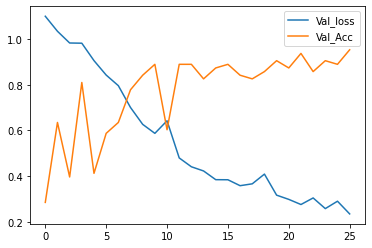

In [403]:
# visualisasi hasil loss dan acc dari proses pelatihan model
plt.figure(figsize=(6,4))
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Val_loss', 'Val_Acc'])
plt.show()

In [404]:
# model.save('saved_model/wheat_seed')

In [405]:
# proses testing atau validasi dari model yang dsudah dilatih
predicted = model.predict(X_val)

# mengubah hasil prediksi menjadi class berdasarkan probabilitas 
predicted_classes = np.argmax(predicted, axis=1)

# menghitung tingkat akurasi (%)
true = 0
for x in range(0, len(predicted_classes)):
    if(predicted_classes[x] == val.filter(['Class']).values[x]):
        true = true + 1
accuracy = (true/len(val))*100
accuracy

2/2 [==============================] - 0s 999us/step


95.23809523809523

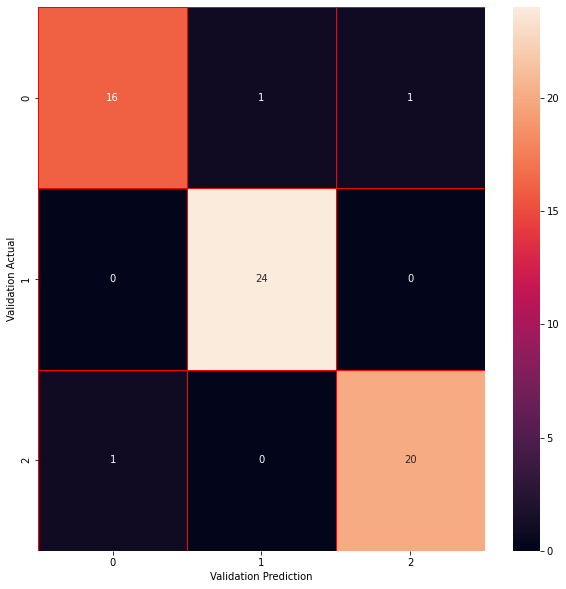

In [413]:
# membuat confussion matrix
val_true = np.array([x[0] for x in val.filter(["Class"]).values])
cm = confusion_matrix(val_true, predicted_classes)
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=True, linewidths=0.5, linecolor="red", ax=ax)
plt.xlabel("Validation Prediction")
plt.ylabel("Validation Actual")
plt.show()